In [22]:
import numpy as np
import pandas as pd
import talib

In [23]:
import random
random.seed(42)

## TESLA Dataset Prices last year

In [24]:
df_prices=pd.read_csv("TSLA_prices_last_year.csv")
dataset=df_prices[['Open', 'High', 'Low', 'Close']]
dataset.tail()

,Open,High,Low,Close
247,328.390015,337.899994,322.260010,329.899994
248,332.540009,342.000000,329.100006,337.320007
249,338.260010,347.839996,334.730011,344.279999
250,343.739990,349.200012,340.910004,346.410004
251,340.500000,343.959991,330.140015,341.399994


## We add indicators

In [25]:
dataset.loc[:,'H-L'] = dataset['High'] - dataset['Low']
dataset.loc[:,'O-C'] = dataset['Close'] - dataset['Open']
dataset.loc[:,'3day MA'] = dataset['Close'].shift(1).rolling(window = 3).mean()
dataset.loc[:,'10day MA'] = dataset['Close'].shift(1).rolling(window = 10).mean()
dataset.loc[:,'30day MA'] = dataset['Close'].shift(1).rolling(window = 30).mean()
dataset.loc[:,'Std_dev']= dataset['Close'].rolling(5).std()
dataset.loc[:,'RSI'] = talib.RSI(dataset['Close'].values, timeperiod = 9)
dataset.loc[:,'Williams %R'] = talib.WILLR(dataset['High'].values, dataset['Low'].values, dataset['Close'].values, 7)

/home/german/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/german/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


## Check if the price rise
Comparamos el precio CLOSE anterior con el actual. Si es mayor el actual entonces 1 sino 0.

In [67]:
dataset.loc[:,'Price_Rise'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)
# Shiftt(-1) Devuelve el valor siguiente al actual.

In [28]:
dataset

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise
0,307.000000,307.500000,299.010010,302.779999,8.489990,-4.220001,NaN,NaN,NaN,NaN,NaN,NaN,1
1,301.019989,306.500000,300.029999,306.049988,6.470001,5.029999,NaN,NaN,NaN,NaN,NaN,NaN,0
2,305.500000,306.890015,301.299988,304.390015,5.590027,-1.109985,NaN,NaN,NaN,NaN,NaN,NaN,0
3,302.500000,304.459991,296.299988,302.989990,8.160003,0.489990,304.406667,NaN,NaN,NaN,NaN,NaN,0
4,302.500000,308.359985,301.850006,302.989990,6.509979,0.489990,304.476664,NaN,NaN,1.392408,NaN,NaN,1
5,300.130005,316.799988,299.109985,315.399994,17.690003,15.269989,303.456665,NaN,NaN,5.206061,NaN,NaN,0
6,315.000000,316.350006,306.899994,308.700012,9.450012,-6.299988,307.126658,NaN,NaN,5.300145,NaN,-39.512078,1
7,306.010010,312.489990,301.500000,311.299988,10.989990,5.289978,309.029999,NaN,NaN,5.384222,NaN,-26.829268,1
8,313.989990,318.140015,311.299988,312.500000,6.840027,-1.489990,311.799998,NaN,NaN,4.684328,NaN,-25.824213,1
9,325.670013,326.670013,313.149994,315.049988,13.520019,-10.620025,310.833333,NaN,NaN,2.772717,69.298535,-38.261493,0


In [29]:
dataset = dataset.dropna()

In [32]:
dataset

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise
30,340.260010,341.489990,330.299988,331.100006,11.190002,-9.160004,340.070007,327.251004,315.728000,4.447452,57.178783,-48.501024,0
31,332.690002,333.100006,325.040009,328.980011,8.059997,-3.709991,337.806671,329.991003,316.672000,5.928429,54.405982,-82.410700,1
32,329.589996,333.739990,327.209991,331.660004,6.529999,2.070008,332.983337,331.563004,317.436334,6.099358,57.347551,-70.446442,0
33,329.510010,330.920013,324.820007,325.200012,6.100006,-4.309998,330.580007,333.605005,318.345334,4.999285,48.808367,-98.320048,0
34,323.829987,323.940002,316.579987,317.290009,7.360015,-6.539978,328.613342,334.612006,319.085668,5.912940,40.500984,-97.645037,0
35,316.000000,317.679993,310.750000,311.640015,6.929993,-4.359985,324.716675,333.450006,319.562335,8.325247,35.628096,-97.526363,1
36,311.750000,315.820007,309.540009,315.359985,6.279998,3.609985,318.043345,330.511008,319.437003,8.085395,40.895375,-81.784102,0
37,316.179993,316.410004,310.000000,311.350006,6.410004,-4.829987,314.763336,328.144006,319.659002,5.639254,37.203639,-92.520668,1
38,312.000000,322.109985,311.000000,320.529999,11.109985,8.529999,312.783335,325.490006,319.660669,3.882422,49.049300,-54.586783,0
39,321.000000,325.250000,315.549988,317.250000,9.700012,-3.750000,315.746663,323.198004,319.928336,3.877162,45.592294,-63.938309,0


## Split the dataset
Tenemos 222 samples. Entonces seleccionamos los ultimos 200 para calcular mejor el batch_size y epoch.
Como luego seleccionamos un 80% para training y un 20% para test. Nos quedaran un training_set de 160 samples
y un test_set de 40 samples.

In [68]:
dataset = dataset[-200:]
print(len(dataset))
X = dataset.iloc[:, 4:-1]
y = dataset.iloc[:, -1]

split = int(len(dataset)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

200


## Featuring Scalling

StandardScaler transformara los datos donde la distribucion tendra un promedio de 0, y una desviacion estandar de 1.
StandarScaler asume que tus datos estan normalmente distribuidos entre los features, y los escalara de tal forma  que queden centrados en un promedio de 0, y una desviacion de 1.
Si los datos no estan distribuidos normalmente, no es el mejor Scaler a usar.

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Build Neural Network with Keras

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [45]:
classifier = Sequential()

Units: Esto define el numero de neuronas en ese layer o capa. Si units=128 entonces significa que tenemos 128 neuronas en nuestro hidden-layer.
Kernel initializer: Esto define los valores de inicio para los pesos de las diferentes neuronas en el hidden layer. Si definimos "uniform", significa que los pesos seran inicializados con valores  desde una distribucion uniforme.
Activation: Esto es una funcion activacion para las neuronas de la capa. Aqui definimos la funcion RELU o Rectified Linear Unit Function.

input_dim= Define el numero de inputs de la hidden layer que estamos definiendo. En este caso definimos igual al numero de columnas de nuestro input feature dataframe. Esto no sera requerido en los siguientes layers, 

Activation: This is the activation function for the neurons in the particular hidden layer. Here we define the function as the rectified Linear Unit function or ‘relu’.
Input_dim: This defines the number of inputs to the hidden layer, we have defined this value to be equal to be equal to the number of columns of our input feature dataframe. This argument will not be required in the subsequent layers, as the model will know how many outputs the previous layer produced.

In [46]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))

In [47]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu'))

In [48]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

Compile: Optimizer. Usamos adam, es una extension del estocastico gradient descent. 
Loss: Esto define la perdida que va a ser optimizada durante el proceso de training. Vamos a usar el metodo de los minimos cuadrados
metrics: Define una lista de metricas que van a ser evaluadas durante fase de training y testing. 

In [49]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

Ahora vamos a entrenar el modelo.
## Que es un batch Size
batch_size se refiere al numero de puntos de datos que el modelo usa para computar el error
antes de hacer backpropagation del error y hacer modificaciones de los pesos.
El Nro de Epoch representa el numero de veces 

Sample. Es una fila o Row de un dataset
Batch Size. Es un hiperparametro que define el numero de samples/row con el que trabjar antes de actualizar los pesos.

Cuando todas las filas o samples de un dataset son usados entonces se llama Batch Gradient Descent. Cuando el batch_size mayor a un sample, y menor al dataset, El algoritmo de aprendizaje es llamado mini-batch gradient descent.
Entonces
BATCH GRADIENT DESCENT: EL batch Size = Size of Training Set.
Stochastic Gradient Descent: Es cuando el batch_size = 1.
Mini batch gradient descent: Cuando batch_size > 1 & batch_size< Size of Training Set. 

Que pasa si el dataset no es divisible por el batch_size? Entonces quitar rows, o hacer que sean divisibles.
Ejemplo batch_size=64, y len(training_dataset)=128. Entonces 128/64 = 2 que es entero.
Si batch_size=100, y el training_set tiene 150 filas. ENtonces 150/100 = 1.5 DEBE ser entero.


## Que es Epoch

El nro Epoch, es un hiperparametro que define cuantas veces el algoritmo de aprendizaje trabajara en todo el dataset.
Epoch=1 significa que cada sample tuvo una oportunidad de actualizar los weights.
Generalmente se usa 200, 500 o mas de 1000.

## diferencia entre epoch y batchsize.
El batch_size es el numero de samples que son procesados antes de actualizar los pesos.
El numero de epochs, es la cantidad de veces que se pasa sobre todo el training_set. 
El tamano de batch_size debe ser 1, igual al nro de samples de dataset, o entre estos valores.


In [50]:
len(X_train)

160

In [51]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
160/160 [==============================] - 0s 1ms/step - loss: 0.2496 - acc: 0.5500
Epoch 2/100
160/160 [==============================] - 0s 113us/step - loss: 0.2467 - acc: 0.5625
Epoch 3/100
160/160 [==============================] - 0s 142us/step - loss: 0.2423 - acc: 0.5625
Epoch 4/100
160/160 [==============================] - 0s 154us/step - loss: 0.2379 - acc: 0.5875
Epoch 5/100
160/160 [==============================] - 0s 136us/step - loss: 0.2340 - acc: 0.6438
Epoch 6/100
160/160 [==============================] - 0s 126us/step - loss: 0.2327 - acc: 0.6438
Epoch 7/100
160/160 [==============================] - 0s 146us/step - loss: 0.2283 - acc: 0.6688
Epoch 8/100
160/160 [==============================] - 0s 162us/step - loss: 0.2248 - acc: 0.6688
Epoch 9/100
160/160 [==============================] - 0s 121us/step - loss: 0.2240 - acc: 0.6375
Epoch 10/100
160/160 [==============================] - 0s 136us/step - loss: 0.2212 - acc: 0.6750
Epoch 11/100
160/160 

160/160 [==============================] - 0s 167us/step - loss: 0.0901 - acc: 0.8937
Epoch 84/100
160/160 [==============================] - 0s 134us/step - loss: 0.0931 - acc: 0.8875
Epoch 85/100
160/160 [==============================] - 0s 130us/step - loss: 0.0946 - acc: 0.9000
Epoch 86/100
160/160 [==============================] - 0s 158us/step - loss: 0.0905 - acc: 0.8875
Epoch 87/100
160/160 [==============================] - 0s 130us/step - loss: 0.0882 - acc: 0.8937
Epoch 88/100
160/160 [==============================] - 0s 146us/step - loss: 0.0880 - acc: 0.9000
Epoch 89/100
160/160 [==============================] - 0s 116us/step - loss: 0.0887 - acc: 0.9125
Epoch 90/100
160/160 [==============================] - 0s 126us/step - loss: 0.0958 - acc: 0.8812
Epoch 91/100
160/160 [==============================] - 0s 156us/step - loss: 0.1071 - acc: 0.8750
Epoch 92/100
160/160 [==============================] - 0s 133us/step - loss: 0.0859 - acc: 0.8937
Epoch 93/100
160/160 [=

In [55]:
y_pred = classifier.predict(X_test)
#y_pred

Ahora vamos a hacer que si la prediccion es mayor a 0.5, es decir mas cercano a 1, es porque mas probabilidad de que haya un cambio de precios positivos.

In [56]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
#y_pred

In [58]:
dataset['y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(y_pred)):,-1:] = y_pred
dataset.tail()

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise,y_pred
247,328.390015,337.899994,322.260010,329.899994,15.639984,1.509979,326.869995,289.648001,285.052330,19.077579,70.164979,-18.251040,1,True
248,332.540009,342.000000,329.100006,337.320007,12.899994,4.779998,331.883331,294.979001,286.550330,8.749333,72.514843,-11.568301,1,True
249,338.260010,347.839996,334.730011,344.279999,13.109985,6.019989,334.023336,301.533002,287.826997,5.773450,74.623943,-5.731763,1,False
250,343.739990,349.200012,340.910004,346.410004,8.290008,2.670014,337.166667,309.570001,289.358664,6.794078,75.277107,-5.789599,0,False
251,340.500000,343.959991,330.140015,341.399994,13.819976,0.899994,342.670003,318.211002,290.935664,6.528089,70.476944,-18.331409,0,False


In [59]:
trade_dataset = dataset.dropna()

In [60]:
trade_dataset

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise,y_pred
212,279.470001,282.000000,273.549988,279.440002,8.450012,-0.029999,276.563334,294.032999,320.187336,8.549682,36.423907,-48.756119,1,True
213,281.440002,292.500000,278.649994,290.540009,13.850006,9.100007,276.059997,290.050000,319.829669,10.288757,44.969621,-16.652139,0,False
214,288.019989,295.000000,285.179993,289.459991,9.820007,1.440002,285.160004,287.918002,319.576336,11.165374,44.317557,-12.959085,1,False
215,288.760010,297.329987,286.519989,295.200012,10.809998,6.440002,286.480001,286.363000,319.197002,5.914876,48.759940,-4.724879,0,False
216,290.040009,300.869995,288.130005,294.839996,12.739990,4.799987,291.733337,285.568002,317.385669,6.373939,48.486989,-12.402303,0,False
217,296.690002,302.640015,275.500000,284.959991,27.140015,-11.730011,293.166666,284.886001,315.608002,4.226423,41.342022,-55.878684,1,True
218,280.510010,300.000000,280.500000,299.019989,19.500000,18.509979,291.666666,284.486999,313.707002,5.504026,52.538827,-12.444217,0,False
219,303.559998,305.980011,293.329987,298.329987,12.650024,-5.230011,292.939992,286.314999,311.022001,5.628321,51.990913,-25.098495,1,False
220,297.700012,300.579987,295.369995,299.100006,5.209992,1.399994,294.103322,288.052997,308.621667,6.011948,52.611367,-22.572187,1,False
221,298.480011,303.000000,293.579987,299.679993,9.420013,1.199982,298.816661,291.638998,306.843334,6.311611,53.124700,-20.669343,1,False


In [61]:
trade_dataset['Tomorrows Returns'] = 0.
trade_dataset['Tomorrows Returns'] = np.log(trade_dataset['Close']/trade_dataset['Close'].shift(1))
trade_dataset['Tomorrows Returns'] = trade_dataset['Tomorrows Returns'].shift(-1)

/home/german/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/german/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/german/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [62]:
trade_dataset

,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,RSI,Williams %R,Price_Rise,y_pred,Tomorrows Returns
212,279.470001,282.000000,273.549988,279.440002,8.450012,-0.029999,276.563334,294.032999,320.187336,8.549682,36.423907,-48.756119,1,True,0.038954
213,281.440002,292.500000,278.649994,290.540009,13.850006,9.100007,276.059997,290.050000,319.829669,10.288757,44.969621,-16.652139,0,False,-0.003724
214,288.019989,295.000000,285.179993,289.459991,9.820007,1.440002,285.160004,287.918002,319.576336,11.165374,44.317557,-12.959085,1,False,0.019636
215,288.760010,297.329987,286.519989,295.200012,10.809998,6.440002,286.480001,286.363000,319.197002,5.914876,48.759940,-4.724879,0,False,-0.001220
216,290.040009,300.869995,288.130005,294.839996,12.739990,4.799987,291.733337,285.568002,317.385669,6.373939,48.486989,-12.402303,0,False,-0.034084
217,296.690002,302.640015,275.500000,284.959991,27.140015,-11.730011,293.166666,284.886001,315.608002,4.226423,41.342022,-55.878684,1,True,0.048162
218,280.510010,300.000000,280.500000,299.019989,19.500000,18.509979,291.666666,284.486999,313.707002,5.504026,52.538827,-12.444217,0,False,-0.002310
219,303.559998,305.980011,293.329987,298.329987,12.650024,-5.230011,292.939992,286.314999,311.022001,5.628321,51.990913,-25.098495,1,False,0.002578
220,297.700012,300.579987,295.369995,299.100006,5.209992,1.399994,294.103322,288.052997,308.621667,6.011948,52.611367,-22.572187,1,False,0.001937
221,298.480011,303.000000,293.579987,299.679993,9.420013,1.199982,298.816661,291.638998,306.843334,6.311611,53.124700,-20.669343,1,False,0.004362


In [64]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['y_pred'] == True, trade_dataset['Tomorrows Returns'], - trade_dataset['Tomorrows Returns'])

trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Tomorrows Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

/home/german/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/german/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/german/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

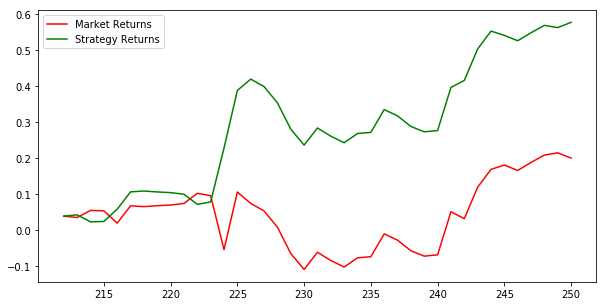

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()